<h1>TEAM NAME: ADANSO

    
<h3>Team Members:<br><br>
1. Adarsh Anand <br>
2. Aniket Chaudhri <br>
3. Somesh Agrawal

In [1]:
import numpy as np
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def calculatez(mean, covariance):
    x, y = np.mgrid[-1:2:.05, -1:2:.05]
    data = np.column_stack([x.flat, y.flat])
    z = mvn.pdf(data,mean, covariance).reshape(x.shape)
    return x,y,z

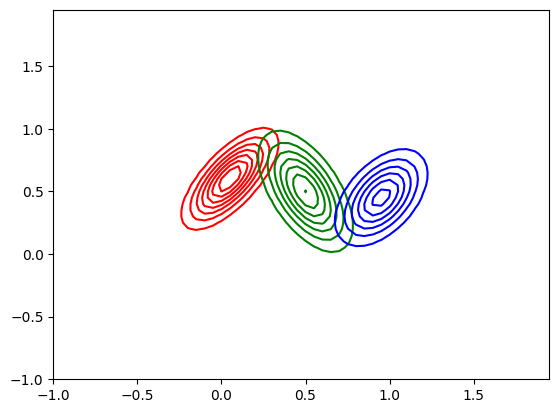

In [3]:
mean1 = np.array([0.05,0.60])

covariance1 = np.array([[0.1,0.05],
                [0.1,0.2]])
covariance1 /= 5
x1,y1,Z1=calculatez(mean1,covariance1)

mean2 = np.array([0.5,0.5])
covariance2 = np.array([[0.1,0.15],
                 [-0.1,0.3]])
covariance2 /= 5

x2,y2,Z2=calculatez(mean2,covariance2)               

mean3 = np.array([0.95,0.45])
covariance3 = np.array([[0.1,0.07],[0.07,0.2]])
covariance3 /= 5

x3,y3,Z3=calculatez(mean3,covariance3)  

plt.contour(x1, y1, Z1,colors='red')
plt.contour(x2, y2, Z2,colors='green')
plt.contour(x3, y3, Z3,colors='blue')
plt.show()



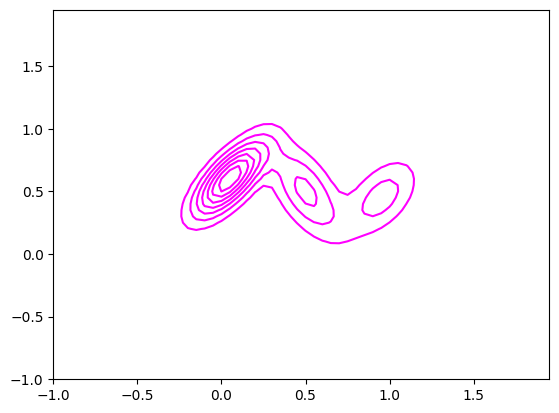

In [4]:
pi_1 = 0.5
pi_2 = 0.3
pi_3 = 0.2
Z=pi_1*Z1 + pi_2*Z2 + pi_3*Z3
plt.contour(x1,y1,Z,colors='magenta')

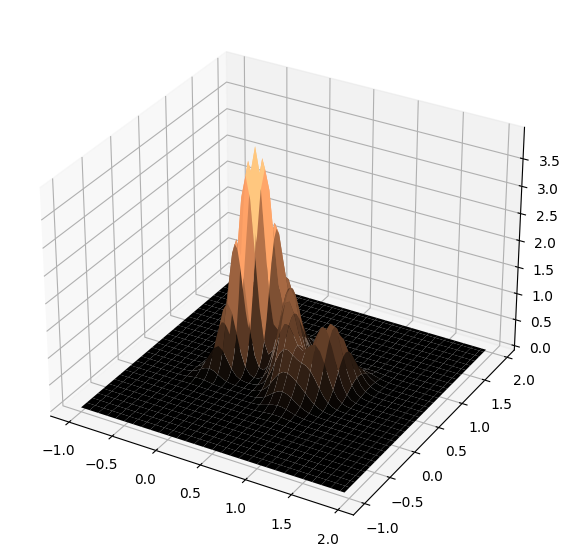

In [5]:
fig=plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.plot_surface(x1, y1, Z,cmap='copper', edgecolor='none')
plt.show()

In [6]:
arr=[]
mean = np.array([mean1,mean2,mean3])
cov = np.array([covariance1,covariance2,covariance3])

stock= np.random.multinomial(1,[pi_1,pi_2,pi_3],size=500)
stock = np.argmax(stock,axis=1)
for i in range(500):
    p=np.random.multivariate_normal(mean[stock[i]],cov[stock[i]],1)
    p.reshape(-1)
    p= np.append(p,stock[i])
    arr.append(p)

/tmp/ipykernel_29288/2995103737.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  p=np.random.multivariate_normal(mean[stock[i]],cov[stock[i]],1)


In [7]:
df= pd.DataFrame(arr)
df

,0,1,2
0,0.874155,0.168285,2.0
1,0.187871,0.763116,0.0
2,1.142888,0.402823,2.0
3,-0.044566,0.689018,0.0
4,0.956848,0.622649,2.0
...,...,...,...
495,0.092981,0.816668,0.0
496,0.216940,0.724313,0.0
497,0.413257,0.501030,1.0
498,0.499478,0.942147,1.0


<AxesSubplot: xlabel='0', ylabel='1'>

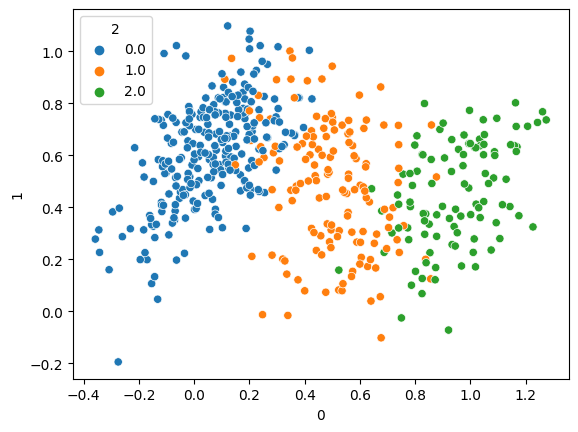

In [8]:
sns.scatterplot(x=df[0],y=df[1],hue=df[2],palette='tab10')

In [9]:
posterior=np.zeros((500,3))
for i in range(500):
    posterior[i][0]=pi_1*mvn.pdf([df.iloc[i][0],df.iloc[i][1]],mean[0],cov[0])/(float)(len(df[df[2]==0]))
    posterior[i][1]=pi_2*mvn.pdf([df.iloc[i][0],df.iloc[i][1]],mean[1],cov[1])/(float)(len(df[df[2]==1]))
    posterior[i][2]=pi_3*mvn.pdf([df.iloc[i][0],df.iloc[i][1]],mean[2],cov[2])/(float)(len(df[df[2]==2]))
    posterior[i][0]=posterior[i][0]/(posterior[i][0]+posterior[i][1]+posterior[i][2])
    posterior[i][1]=posterior[i][1]/(posterior[i][0]+posterior[i][1]+posterior[i][2])
    posterior[i][2]=posterior[i][2]/(posterior[i][0]+posterior[i][1]+posterior[i][2])

# posterior /= np.sum(posterior, axis=0)

In [10]:
posterior

array([[1.00665156e-24, 7.06796281e-02, 6.09012836e-02],
       [9.05288004e-01, 1.10656461e-03, 4.81034676e-14],
       [5.01685144e-31, 3.24446647e-06, 9.98868103e-01],
       ...,
       [3.10366830e-04, 9.66336293e-01, 4.75151596e-07],
       [6.79928112e-02, 1.49379819e-02, 1.94280632e-08],
       [8.77997687e-01, 1.39702945e-03, 8.03242321e-14]])

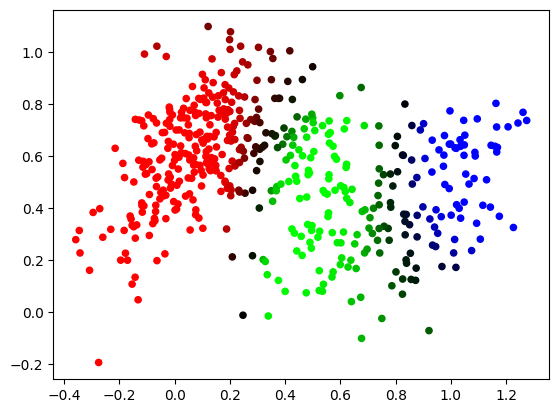

In [11]:
x = df[0]
y = df[1]
rgb = posterior

fig, ax = plt.subplots()
plt.scatter(x, y, s=20, facecolors=rgb)
plt.show()

